<a href="https://colab.research.google.com/github/minjeon99/ESAA_YB/blob/Week6/week6_fri_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **04. 분류**

## **07. LightGBM**
**장점 (XGBoost와 비교)**
- 빠른 학습/예측 수행 시간
- 작은 메모리 사용량
- 카테고리형 피처 자동 변환과 최적 분할

**단점**
- 적은 데이터 세트(10,000건 이하)에 적용할 경우 과적합 발생이 쉬움

**구현 사상**
- 대부분의 트리 기반 알고리즘: 최대한 균형 잡힌 트리 유지하며 분할하는 **균형 트리 분할(Level Wise)** 방식

  => 오버피팅에 강한 구조 / 균형 맞추기 위한 시간 소요
- LightGBM: 트리 균형을 맞추지 않고 최대 손실 값을 가지는 리프 노드를 분할하는 **리프 중심 트리 분할(Leaf Wise)** 방식

  => 예측 오류 손실 최소

  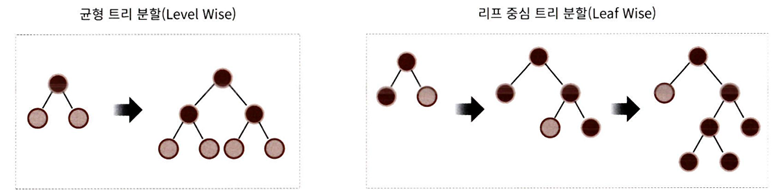

- 파이썬의 `lightgbm` 패키지
  - 분류 클래스: `LGBMClassifier`, 회귀 클래스: `LGBMRegressor`

### **LightGBM 하이퍼 파라미터**

**주요 파라미터**

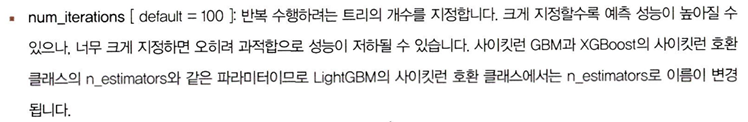

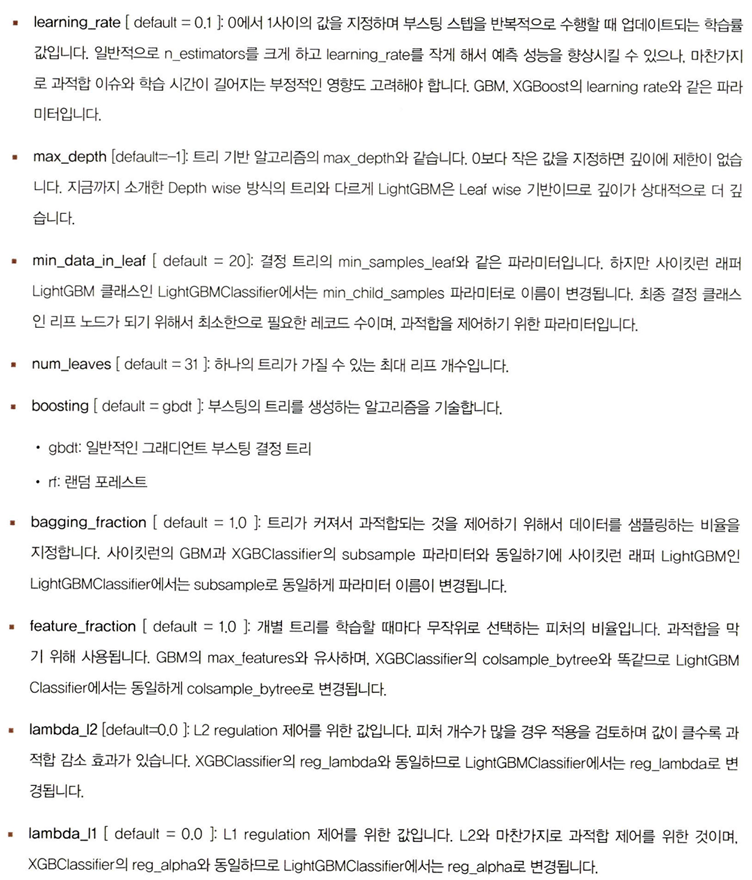

**Learning Task 파라미터**

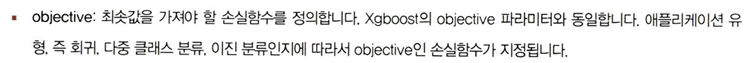

### **하이퍼 파라미터 튜닝 방안**
: `num_leaves` 개수를 중심으로 `min_child_samples`(`min_data_in_leaf`), `max_depth`를 함께 조정하며 모델의 복잡도 줄이는 것이 기본 튜닝 방안
- **num_leaves**: 개별 트리가 가질 수 있는 최대 리프 개수. LightGBM 모델의 복잡도를 제어하는 주요 파라미터. num_leaves를 높이면 정확도가 높아지지만 트리가 깊어지고 모델의 복잡도가 커져 과적합 영향도가 커짐
- **min_child_samples = min_data_in_leaf**: 과적합 개선을 위한 중요 파라미터. num_leaves와 학습 데이터 크기에 따라 달라지지만, 일반적으로 큰 값으로 설정하면 트리 깊어지는 것을 방지
- **max_depth**: 명시적으로 깊이의 크기 제한. `num_leaves`, `min_data_in_leaf`와 결합해 과적합 개선에 사용

### **파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교**

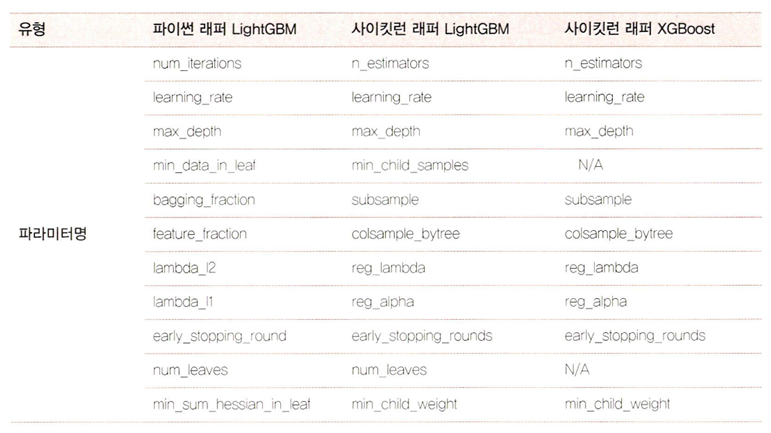

### **LightGBM 적용 - 위스콘신 유방암 예측**

In [ ]:
import lightgbm

print(lightgbm.__version__)

2.2.1


In [ ]:
!pip install lightgbm==2.2.1

In [ ]:
# 교재와 동일한 하이퍼 파라미터 사용을 위한 다운그레이드
import lightgbm

print(lightgbm.__version__)

2.2.1


In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from lightgbm import early_stopping

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.600521	valid_0's binary_logloss: 0.600521
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.566786	valid_0's binary_logloss: 0.566786
[3]	valid_0's binary_logloss: 0.537032	valid_0's binary_logloss: 0.537032
[4]	valid_0's binary_logloss: 0.510051	valid_0's binary_logloss: 0.510051
[5]	valid_0's binary_logloss: 0.484612	valid_0's binary_logloss: 0.484612
[6]	valid_0's binary_logloss: 0.462044	valid_0's binary_logloss: 0.462044
[7]	valid_0's binary_logloss: 0.441736	valid_0's binary_logloss: 0.441736
[8]	valid_0's binary_logloss: 0.423503	valid_0's binary_logloss: 0.423503
[9]	valid_0's binary_logloss: 0.404695	valid_0's binary_logloss: 0.404695
[10]	valid_0's binary_logloss: 0.389195	valid_0's binary_logloss: 0.389195
[11]	valid_0's binary_logloss: 0.374328	valid_0's binary_logloss: 0.374328
[12]	valid_0's binary_logloss: 0.360338	valid_0's binary_logloss: 0.360338
[13]	valid_0's binary_logloss: 0.347847	valid_

- 조기 중단으로 181번 반복까지만 수행하고 학습 종료

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740,    F1: 0.9615, AUC:0.9926


- `plot_importance()`: 피처 중요도 시각화 내장 API

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

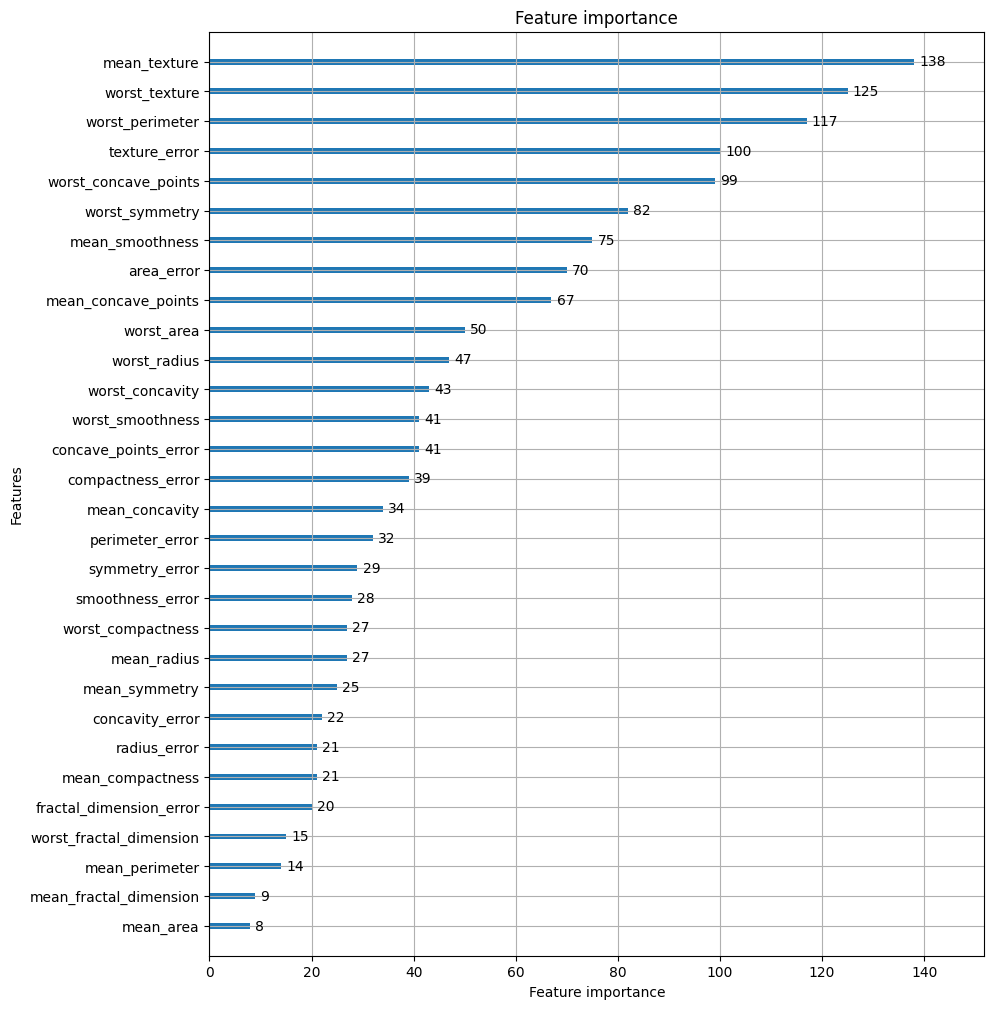

In [ ]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## **4.8 분류 실습 - 캐글 산탄데르 고객 만족 예측**

### **데이터 전처리**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("./train.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


- 클래스 칼럼 포함 371개 피처

In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


- float: 111개
- int: 260개
- 모두 숫자형
- Null 없음

In [3]:
# Target 레이블 속성 값 분포
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


- 대부분 만족, 불만족은 4%

In [4]:
# 각 피처 값 분포
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


**var3**
- min=-999999
- NaN이나 예외 값을 변환했을 것
-
  ```
  print(cust_df.var3.value_counts()[:10])
  ```
총 116개 존재

  => 최빈값 2로 변환

In [5]:
# var3 피처 값 대체
cust_df['var3'].replace(-999999, 2, inplace=True)
# ID 피처 드롭
cust_df.drop('ID', axis=1, inplace=True)

# 피처/레이블 세트 분리
## 레이블 컬럼: DataFrame의 맨 마지막 => 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


- 학습과 성능 평가를 위해 원본 데이터에서 학습/데이터 세트 분리
- 비대칭 데이터 세트 => Target 값 분포도가 학습/테스트 데이터 세트에 모두 비슷하게 추출됐는지 확인

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


- 두 세트의 TARGET 값 분포 모두 유사하게 4% 정도의 불만족(1)

## **XGBoost 모델 학습과 하이퍼 파라미터 튜닝**

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83789	validation_1-auc:0.82554
[1]	validation_0-auc:0.84273	validation_1-auc:0.82878
[2]	validation_0-auc:0.84901	validation_1-auc:0.83359
[3]	validation_0-auc:0.85530	validation_1-auc:0.83767
[4]	validation_0-auc:0.85891	validation_1-auc:0.83909
[5]	validation_0-auc:0.86117	validation_1-auc:0.84156
[6]	validation_0-auc:0.86378	validation_1-auc:0.84138
[7]	validation_0-auc:0.86737	validation_1-auc:0.84048
[8]	validation_0-auc:0.87021	validation_1-auc:0.84162
[9]	validation_0-auc:0.87258	validation_1-auc:0.84100
[10]	validation_0-auc:0.87505	validation_1-auc:0.84117
[11]	validation_0-auc:0.87747	validation_1-auc:0.84111
[12]	validation_0-auc:0.87872	validation_1-auc:0.84114
[13]	validation_0-auc:0.88087	validation_1-auc:0.84066
[14]	validation_0-auc:0.88208	validation_1-auc:0.84014
[15]	validation_0-auc:0.88340	validation_1-auc:0.83965
[16]	validation_0-auc:0.88557	validation_1-auc:0.83950
[17]	validation_0-auc:0.88664	validation_1-auc:0.84013
[18]	validation_0-au

In [12]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도 향상을 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

# cv=3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set = [(X_train, y_train), (X_test, y_test)])

[0]	validation_0-auc:0.80705	validation_1-auc:0.80366
[1]	validation_0-auc:0.80607	validation_1-auc:0.80683
[2]	validation_0-auc:0.79962	validation_1-auc:0.80156
[3]	validation_0-auc:0.80463	validation_1-auc:0.80839
[4]	validation_0-auc:0.82994	validation_1-auc:0.82595
[5]	validation_0-auc:0.84026	validation_1-auc:0.83143
[6]	validation_0-auc:0.84642	validation_1-auc:0.83616
[7]	validation_0-auc:0.84635	validation_1-auc:0.83399
[8]	validation_0-auc:0.85018	validation_1-auc:0.83592
[9]	validation_0-auc:0.85084	validation_1-auc:0.83463
[10]	validation_0-auc:0.85227	validation_1-auc:0.83362
[11]	validation_0-auc:0.85527	validation_1-auc:0.83695
[12]	validation_0-auc:0.85693	validation_1-auc:0.83944
[13]	validation_0-auc:0.85857	validation_1-auc:0.83941
[14]	validation_0-auc:0.85898	validation_1-auc:0.83988
[15]	validation_0-auc:0.85928	validation_1-auc:0.83954
[16]	validation_0-auc:0.86102	validation_1-auc:0.83887
[17]	validation_0-auc:0.86239	validation_1-auc:0.83818
[18]	validation_0-au

NameError: name 'roc_acu_score' is not defined

In [18]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 1}
ROC AUC: 0.8440


In [23]:
# n_estimators는 100으로 증가, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 성능 평가 지표 auc로, 조기 중단 파라미터 값 200으로 설정하고 학습
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.84570	validation_1-auc:0.82819
[1]	validation_0-auc:0.84118	validation_1-auc:0.82296
[2]	validation_0-auc:0.84774	validation_1-auc:0.82904
[3]	validation_0-auc:0.85009	validation_1-auc:0.83329
[4]	validation_0-auc:0.85195	validation_1-auc:0.83447
[5]	validation_0-auc:0.85234	validation_1-auc:0.83502
[6]	validation_0-auc:0.84945	validation_1-auc:0.83320
[7]	validation_0-auc:0.85042	validation_1-auc:0.83374
[8]	validation_0-auc:0.85098	validation_1-auc:0.83285
[9]	validation_0-auc:0.84973	validation_1-auc:0.83148
[10]	validation_0-auc:0.85060	validation_1-auc:0.83219
[11]	validation_0-auc:0.85187	validation_1-auc:0.83210
[12]	validation_0-auc:0.84997	validation_1-auc:0.83135
[13]	validation_0-auc:0.85146	validation_1-auc:0.83182
[14]	validation_0-auc:0.85342	validation_1-auc:0.83388
[15]	validation_0-auc:0.85422	validation_1-auc:0.83446
[16]	validation_0-auc:0.85580	validation_1-auc:0.83501
[17]	validation_0-auc:0.85613	validation_1-auc:0.83539
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

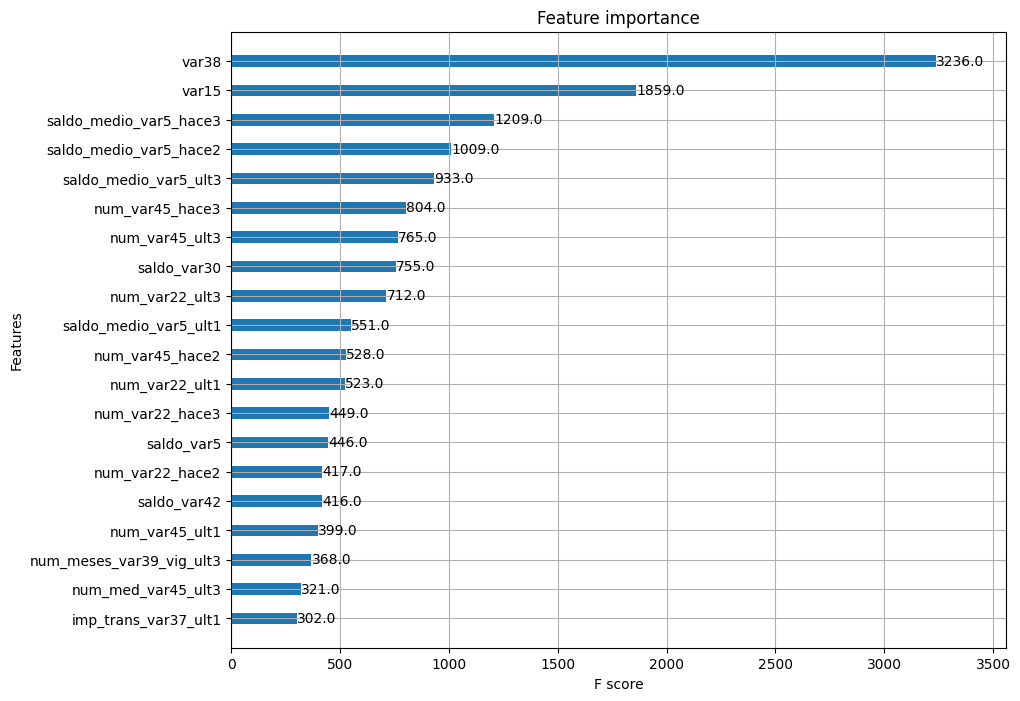

In [24]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

## **LightGBM 모델 학습과 하이퍼 파라미터 튜닝**

In [26]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.14

In [28]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도 향상을 위해 n_estimators 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64],
          'max_depth':[128,160],
          'min_child_samples':[60,100],
          'subsample':[0.8,1]}

# cv=3 지정
girdcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

[0]	validation_0-auc:0.80705	validation_1-auc:0.80366
[1]	validation_0-auc:0.80607	validation_1-auc:0.80683
[2]	validation_0-auc:0.79962	validation_1-auc:0.80156
[3]	validation_0-auc:0.80463	validation_1-auc:0.80839
[4]	validation_0-auc:0.82994	validation_1-auc:0.82595
[5]	validation_0-auc:0.84026	validation_1-auc:0.83143
[6]	validation_0-auc:0.84642	validation_1-auc:0.83616
[7]	validation_0-auc:0.84635	validation_1-auc:0.83399
[8]	validation_0-auc:0.85018	validation_1-auc:0.83592
[9]	validation_0-auc:0.85084	validation_1-auc:0.83463
[10]	validation_0-auc:0.85227	validation_1-auc:0.83362
[11]	validation_0-auc:0.85527	validation_1-auc:0.83695
[12]	validation_0-auc:0.85693	validation_1-auc:0.83944
[13]	validation_0-auc:0.85857	validation_1-auc:0.83941
[14]	validation_0-auc:0.85898	validation_1-auc:0.83988
[15]	validation_0-auc:0.85928	validation_1-auc:0.83954
[16]	validation_0-auc:0.86102	validation_1-auc:0.83887
[17]	validation_0-auc:0.86239	validation_1-auc:0.83818
[18]	validation_0-au

In [29]:
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8440
